<a href="https://colab.research.google.com/github/sosnes/dsc-importing-data-using-pandas-lab/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customizing Visualizations with Matplotlib - Lab

## Introduction

This lab requires you to draw some basic visualizations using the techniques from the previous lesson.

## Objectives

You will be able to:

* Create subplots using a Matplotlib figure
* Use different linestyles within a Matplotlib visualization
* Create labels and titles for visualizations
* Create a lineplot using linspace

Let's give you a head start by generating some data for you to plot:

In [1]:
# Run this cell without changes
import numpy as np

# Generate a list of numbers from 0 to 99
x_values = np.arange(0,100)

# Multiply values of x_values with 2 to get y_values
y_values = x_values*2

# Calculate square of values in for variable z_values
z_values = x_values**2

# Print x_values, y_values and z_values
print (x_values, y_values, z_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198] [   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681
 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025
 31

Import `matplotlib.pyplot` as `plt` and set `%matplotlib inline`  for generating inline images in Jupyter notebooks.

In [2]:
# Your code here
import matplotlib.pyplot as plt

%matplotlib inline

Now that we have our data all set and Matplotlib in our Python environment, we can try some basic plotting techniques.

## Exercise 1

Perform the following steps in the cell below:

* Create a new figure object `fig` using `.figure()` function.
* Use `add_axes()` to add an axis `ax` to the canvas at absolute location [0,0,1,1].
* Plot (x,y) on that axes and set the labels and title.

The graph you create should look like this:

![line plot](https://curriculum-content.s3.amazonaws.com/data-science/images/line_plot.png)

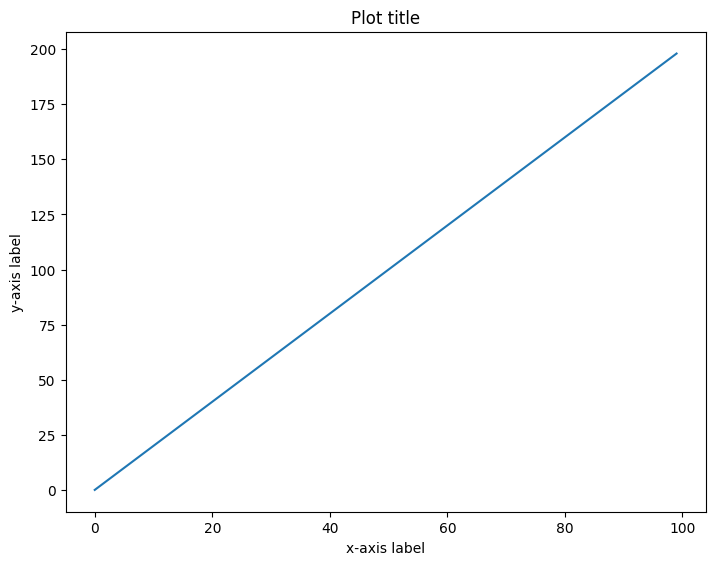

In [3]:

# Set up figure and axes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Plot x and y as a line graph
ax.plot(x_values,y_values)

# Set labels and title
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
ax.set_title('Plot title');

This was easy, let's move on to drawing multiple plots within a figure space.

## Exercise 2

Perform following actions:

* Create a subplots figure with 3 rows and 4 columns and a `figsize` of 15 by 15
* Plot the lines $y=x$, $y=2x$, $y=3x$, $y=4x$,...$y=10x$, $y=11x$, $y=12x$ in the respective subplots. So, $y=x$ in the 0th row, 0th column, $y=2x$ in the 0th row, 1th column, etc.
* Use the variable `x` that we have already created for you as $x$, then calculate your own $y$. Call this $y$ `y_new` (within a for loop).

The graph you create should look like this:

![subplots showing 1x through 12x](https://curriculum-content.s3.amazonaws.com/data-science/images/subplots_1x_12x.png)

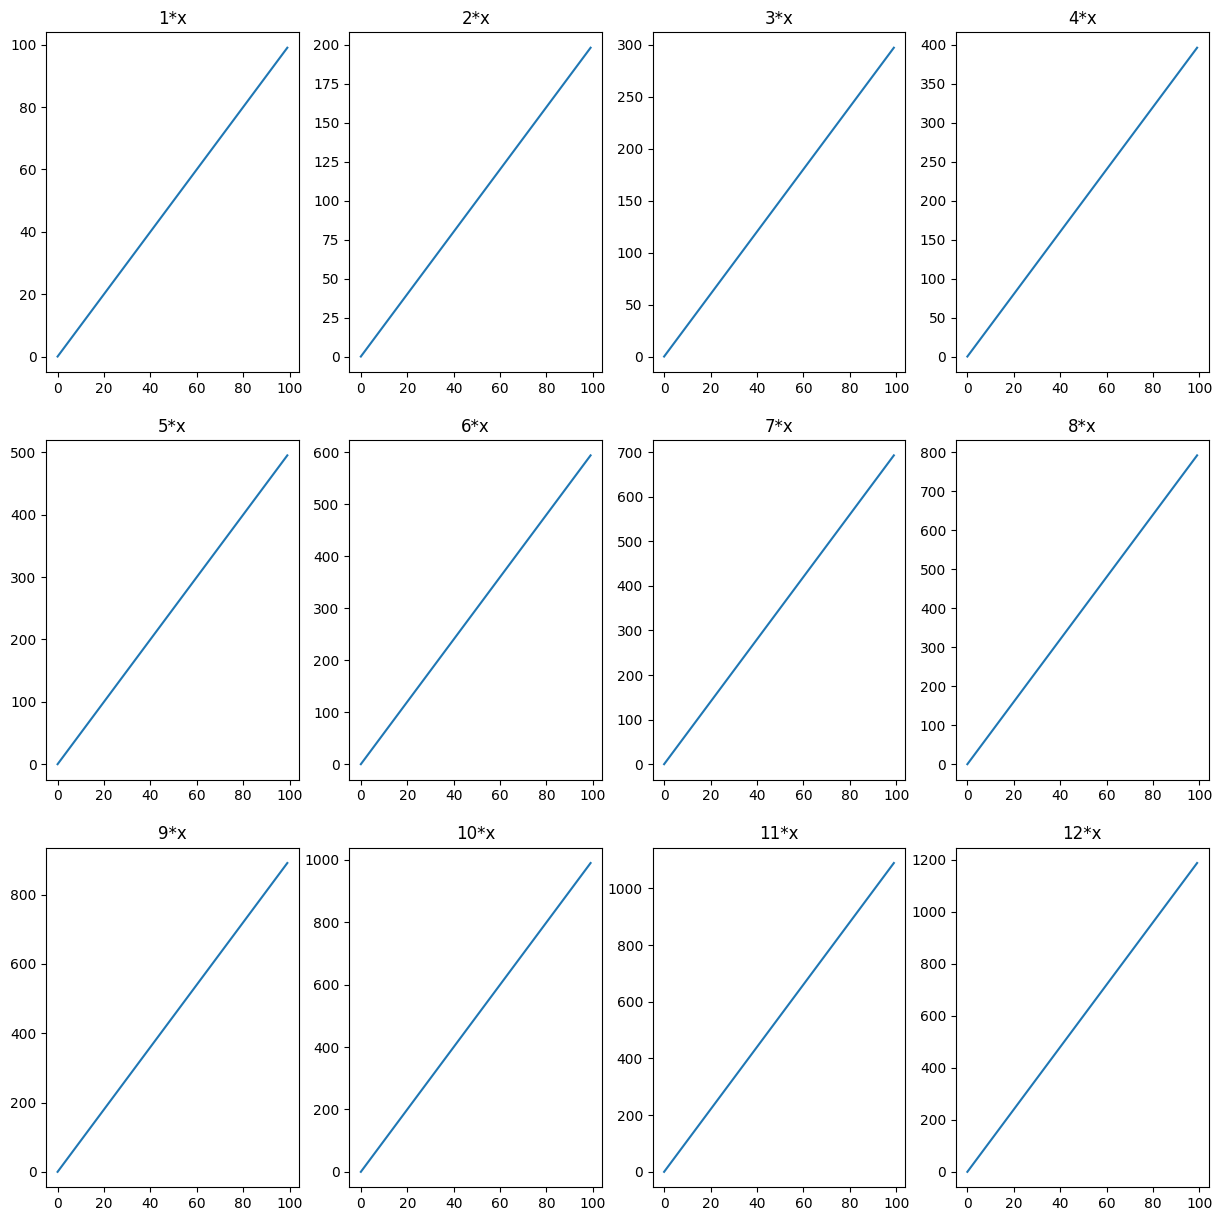

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,15))

for i in range(1,13):
    # for both row and col, subtract 1 from i, since we are starting
    # i at 1 but the row/col indices start at 0
    row = (i-1)//4
    col = i%4-1
    ax = axes[row][col]

    # with NumPy broadcasting we can just multiply x by i and every
    # element in x is multiplied
    y_new = i*x_values
    ax.plot(x_values, y_new)
    ax.set_title('{}*x'.format(i))

## Exercise 3

As you might have noticed, the y-axis of those graphs automatically adjusted based on the value of `y_new`. This creates the appearance of all of the lines having the same slope, even though they actually have quite different slopes.

Repeat the above exercise, but standardize the axes of all of your subplots so that you can more easily compare the slopes of the lines. Because the final graph goes up to 1200, use this as the maximum for all plots.

The graph you create should look like this:

![subplots showing 1x through 12x with the same y-axis](https://curriculum-content.s3.amazonaws.com/data-science/images/subplots_1x_12x_normalized.png)

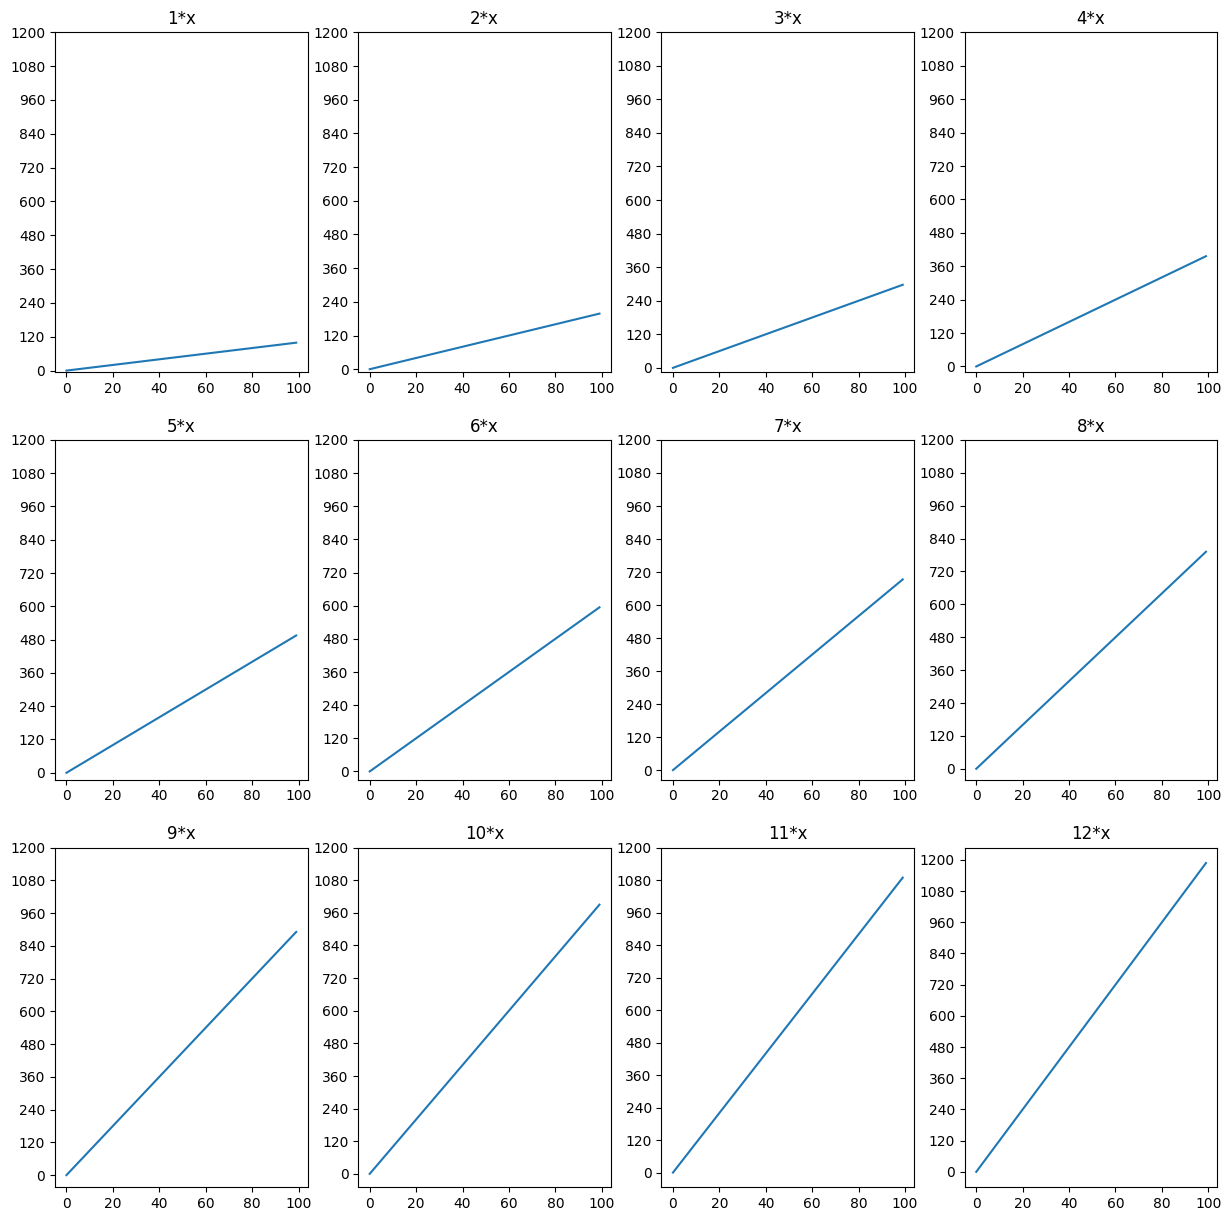

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,15))

for i in range(1,13):
    row = (i-1)//4
    col = i%4-1
    ax = axes[row][col]
    y_new = i*x_values
    ax.plot(x_values, y_new)
    ax.set_title('{}*x'.format(i))
    # this line is the only change, setting the yticks
    ax.set_yticks(np.linspace(0,1200,11))

## Exercise 4

Perform the following steps in the cell below:

* Using `plt.subplots`, create a figure of size 8 by 6 with 2 columns, and "unpack" the 2 created axes into variables `ax1` and `ax2`.
* Plot (`x`,`y`) and (`x`,`z`) on `ax1` and `ax2` respectively.
* Set the line width of first axes to 3, line style as dotted and color it red.
* Set the line width of second axes to 5, line style as dash-dot (-.) and color it blue.
* Give the plots some labels and titles

Hints:
* If `y` is looking "off" but your graph code seems correct, it's possible you overwrote the original values in a previous exercise. Go back to the top of the notebook and re-run the first cell that created `x`, `y`, and `z`.
* The label `variable - z` is intentionally overlapping the graph on the left. We will address that issue later in the lab.

The graph you create should look like this:

![two subplots](https://curriculum-content.s3.amazonaws.com/data-science/images/subplots_left_right.png)

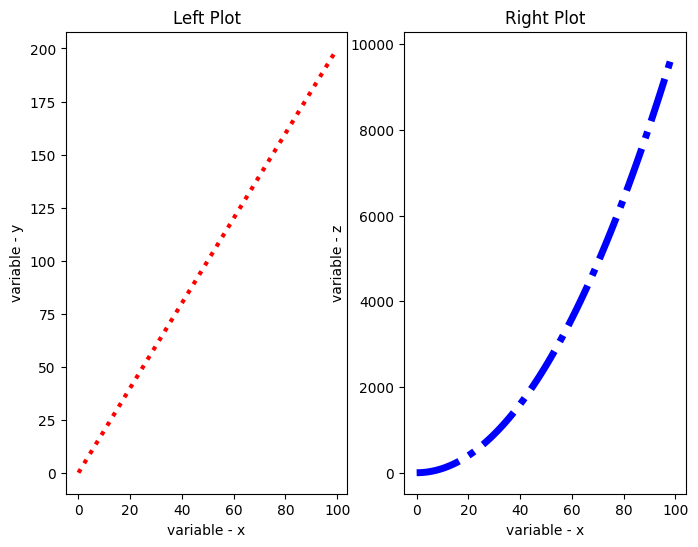

In [6]:
new_figure, (ax1, ax2) = plt.subplots(figsize=(8,6), ncols=2)

ax1.plot(x_values, y_values, color='red', linewidth=3, linestyle = ':')
ax2.plot(x_values, z_values, color='blue', linewidth=5, linestyle = '-.')

ax1.set_xlabel('variable - x')
ax1.set_ylabel('variable - y')
ax1.set_title ('Left Plot')

ax2.set_xlabel('variable - x')
ax2.set_ylabel('variable - z')
ax2.set_title ('Right Plot');

## Exercise 5

The above figure looks fine but a bit out of proportion. Let's resize this to make the plots look more appealing by ensuring that subplots are square in shape. Also change the line style of first plot (left) and change the type of 2nd plot (right) to a scatter plot with a `^` marker style.

The plot you create should look like this:

![two square subplots](https://curriculum-content.s3.amazonaws.com/data-science/images/subplots_left_right_square.png)

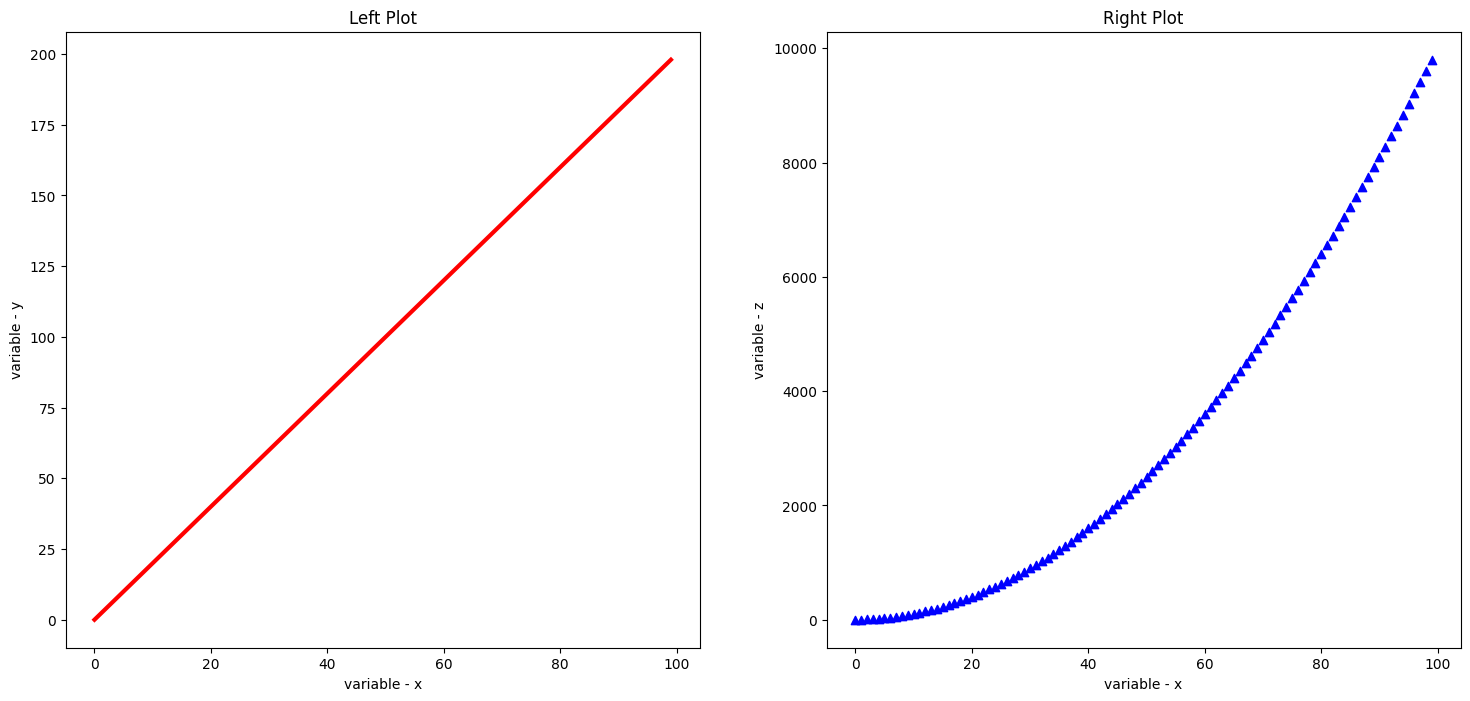

In [7]:
new_figure, (ax1, ax2) = plt.subplots(figsize=(18,8), ncols=2)

ax1.plot(x_values, y_values, color='red', linewidth=3, linestyle = '-')
ax2.scatter(x_values, z_values, color='blue',  marker='^')

ax1.set_xlabel('variable - x')
ax1.set_ylabel('variable - y')
ax1.set_title ('Left Plot')

ax2.set_xlabel('variable - x')
ax2.set_ylabel('variable - z')
ax2.set_title ('Right Plot');

**Note:** Instead of changing the plot size as you did in Exercise 5, one other technique you could have used to help with overlapping plot labels is a "tight layout" (see [Matplotlib guide](https://matplotlib.org/tutorials/intermediate/tight_layout_guide.html)).

By default, Matplotlib doesn't consider the space taken by axes labels when it determines how to draw the plots. Turning on the tight layout setting tells Matplotlib to include the axes labels in this calculation, in order to avoid clipping or overlapping.

Here is a version of the Exercise 4 solution using a tight layout:

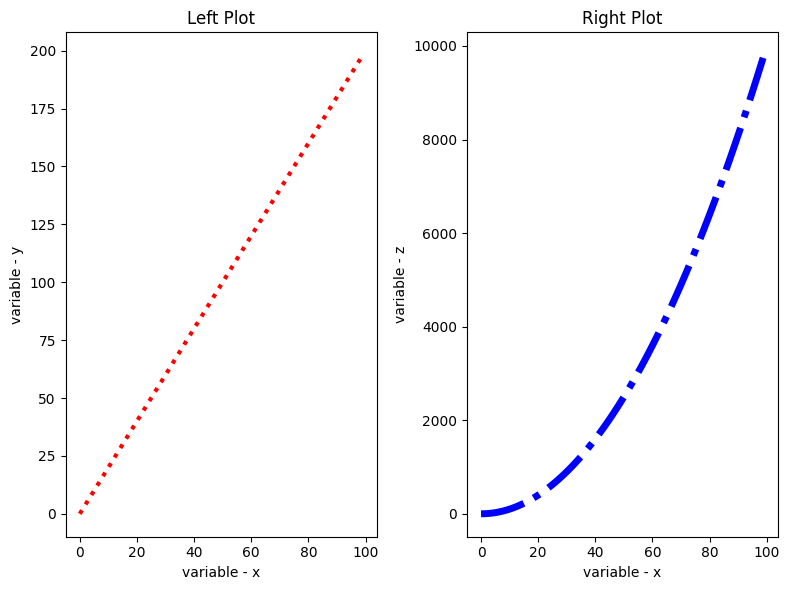

In [8]:
# Run this cell without changes

new_figure, (ax1, ax2) = plt.subplots(figsize=(8,6), ncols=2)
# Telling Matplotlib to include axes labels when creating the layout
new_figure.set_tight_layout(True)

ax1.plot(x_values, y_values, color='red', linewidth=3, linestyle = ':')
ax2.plot(x_values, z_values, color='blue', linewidth=5, linestyle = '-.')

ax1.set_xlabel('variable - x')
ax1.set_ylabel('variable - y')
ax1.set_title ('Left Plot')

ax2.set_xlabel('variable - x')
ax2.set_ylabel('variable - z')
ax2.set_title ('Right Plot');

Compared to Exercise 4, we are now avoiding the label `variable - z` overlapping with the plot on the left, without changing the overall figure size like we did in Exercise 5.

Note that the above example uses the object-oriented interface, by calling the `.set_tight_layout` method on the figure object.

A tight layout can also be set using the PyPlot interface (state machine interface) introduced in the previous lesson. You will frequently see this in examples online, adding this line of code as the last line before the figure is displayed:

```python
plt.tight_layout()
```

Congratulations! You've practiced the basics of plotting, labeling, and customizing plots with Matplotlib. You will use these skills throughout the rest of the course.

## Summary

This lab focused on ensuring that you understand the basic plotting techniques in Matplotlib using plotting objects and functions to draw single plots, as well as figures with multiple subplots. You also practiced customizing the plots with labels, titles and axes definitions.